In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import torch
from torch import nn
from google.colab.patches import cv2_imshow

## Part 1: 
Question 1:  

A. PCA for image compression and reconstruction. Below is a picture for the Natural Park of Montseny. Can you use PCA to extract the components of the image and reconstruct the image with the first 100 components, 200, 300 components or even more? 

B. Make a plot for accumulative variance (y-axis) with the number of principle components (x-axis). (You need to implement by yourself, not calling a function.)

In [ ]:
#reading an image into numpy array
array_im = cv2.imread("/content/hw3_image_1.jpg")

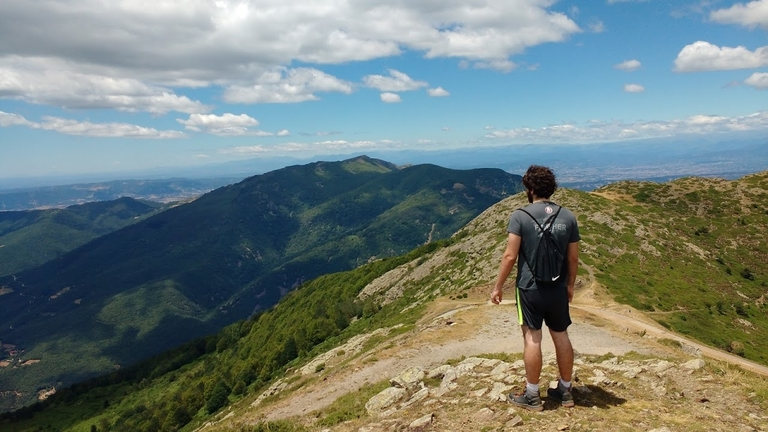

In [ ]:
cv2_imshow(array_im)

In [ ]:
print(array_im.shape)

(432, 768, 3)


To use the colored image for PCA, we need to apply PCA on individual R, G, B channels of an image.

Reference tutorials for "split" method: 
1. https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118

In [ ]:
#getting the r, g, b components of an image
im_r, im_g, im_b = cv2.split(array_im)

In [ ]:
im_r.shape

(432, 768)

In [ ]:
#function to calculate means
def calc_mean(img):
  mean = np.mean(img, axis = 0)
  return mean

In [ ]:
#function to get eigen vectors and eigenvalues[numpy documentation]
def eigen(mat):
  eigen_val, eigen_vec = np.linalg.eig(mat)
  return eigen_val, eigen_vec

References: {referred but not copied from}
1. [formulae, and methods] In-class module- slides [PCA for dimensionality reduction]
2. [for grayscale image reconstruction] https://medium.com/@pranjallk1995/pca-for-image-reconstruction-from-scratch-cf4a787c1e36

In [ ]:
def method_pca(im, pc):
  mean = calc_mean(im)

  #subtracting mean from image array
  X_red = im - mean # X_reduced

  #getting covariance matrix
  im_cov = np.cov(X_red)

  #getting eigen_values and eigen_vectors
  e_val, e_vec = eigen(im_cov)

  #sorting eigen_values and eigen_vectors in descending order[argsort documentation]
  eig_sort = np.argsort(e_val)[::-1]

  eval_sort = e_val[eig_sort]
  evec_sort = e_vec[:, eig_sort]

  #for calculation of variance explained: 
  #referenced for understanding [but not copied]: https://vitalflux.com/pca-explained-variance-concept-python-example/#:~:text=Explained%20variance%20is%20calculated%20as,decomposition%20PCA%20class.
  eval_sum = sum(eval_sort)
  var_explained = [(i / eval_sum) for i in eval_sort]

  #here the number of principal components should be less than 432
  #selecting required number of components into vector
  vec = evec_sort[:, range(pc)]

  X_recov = np.dot(vec.T, X_red) # (X recovered = X_reduced . W)
  reconst = np.dot(vec, X_recov) + mean

  return reconst, var_explained

 #referenced for understanding [but not copied]: https://vitalflux.com/pca-explained-variance-concept-python-example/#:~:text=Explained%20variance%20is%20calculated%20as,decomposition%20PCA%20class.

PCA for 10 components:

In [ ]:
#number of principal components
pc = 10

implementing PCA for every channel

In [ ]:
reconst_r, varr = method_pca(im_r, pc)
reconst_g, varg = method_pca(im_g, pc)
reconst_b, varb = method_pca(im_b, pc)

Combining R,G,B components.


In [ ]:
im2 = cv2.merge([reconst_r, reconst_g, reconst_b])

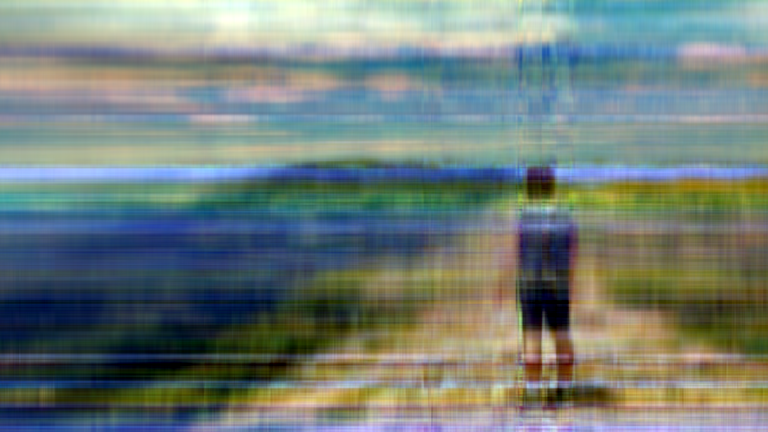

In [ ]:
cv2_imshow(im2)

PCA for 100 components:


In [ ]:
#number of principal components
pc = 100

In [ ]:
reconst_r, varr = method_pca(im_r, pc)
reconst_g, varg = method_pca(im_g, pc)
reconst_b, varb = method_pca(im_b, pc)

In [ ]:
im2 = cv2.merge([reconst_r, reconst_g, reconst_b])

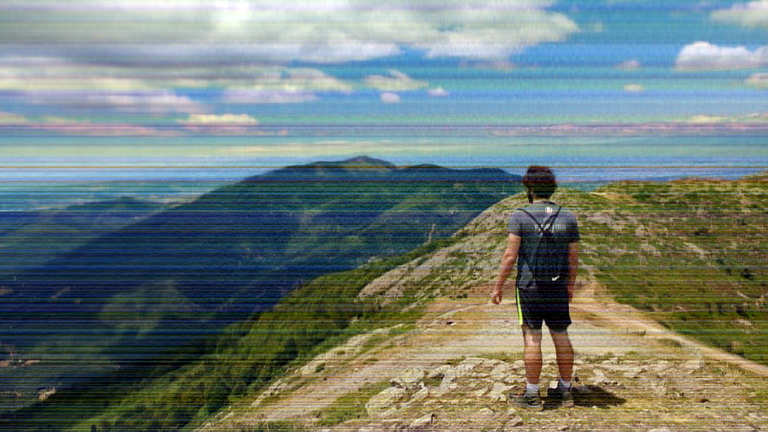

In [ ]:
cv2_imshow(im2)

In [ ]:
#calculating cumulative explained variance
cumulative_v = np.cumsum(varr)

**Plot for accumulative variance vs number
of principle components:**

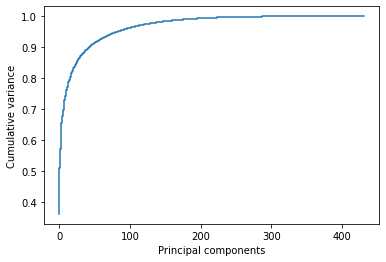

In [ ]:
plt.step(range(0,len(cumulative_v)), cumulative_v)
plt.ylabel('Cumulative variance')
plt.xlabel('Principal components')
plt.show()

PCA for 200 components:

In [ ]:
#number of principal components
pc = 200

In [ ]:
reconst_r, varr = method_pca(im_r, pc)
reconst_g, varg = method_pca(im_g, pc)
reconst_b, varb = method_pca(im_b, pc)

In [ ]:
im2 = cv2.merge([reconst_r, reconst_g, reconst_b])

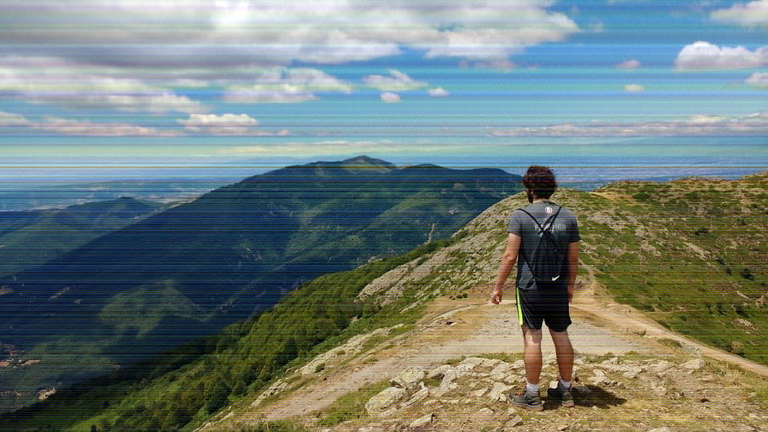

In [ ]:
cv2_imshow(im2)

PCA for 300 components:

In [ ]:
#number of principal components
pc = 300

In [ ]:
reconst_r, varr = method_pca(im_r, pc)
reconst_g, varg = method_pca(im_g, pc)
reconst_b, varb = method_pca(im_b, pc)

In [ ]:
im2 = cv2.merge([reconst_r, reconst_g, reconst_b])

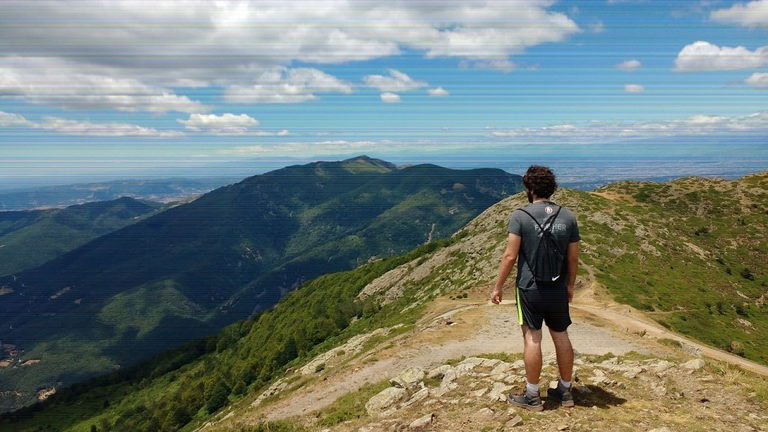

In [ ]:
cv2_imshow(im2)

PCA for 400 components:

In [ ]:
#number of principal components
pc = 400

In [ ]:
reconst_r, varr = method_pca(im_r, pc)
reconst_g, varg = method_pca(im_g, pc)
reconst_b, varb = method_pca(im_b, pc)

In [ ]:
im2 = cv2.merge([reconst_r, reconst_g, reconst_b])

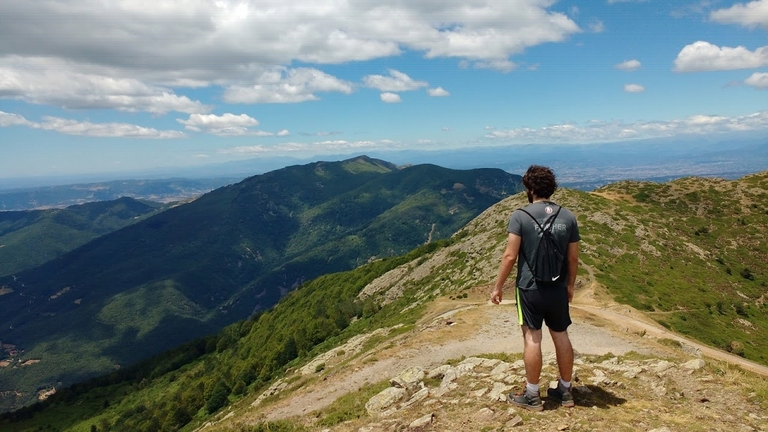

In [ ]:
cv2_imshow(im2)

The number of principal components cannot exceed 432, as the dimensions of each [channel] image are (432, 768).

##Part 2
Question 2: Naive Bayes (40 points)
During our lecture, we have talked about Naive Bayes. But we didn’t got a change to go deep how to implement Naive Bayes for a real world application. First I encourage you to read through the additional learning material with different probability models. Then try to solve the following problem:

People’s name can be connected to which country he/she comes from. Here we have 4000 (fake) names:

Japanese, American, Arabic, and Greek. Implement a NB classifier that can make a prediction given a new
name. Hint:

•First read through the additional material and think about which probabilistic model you would like to choose.

•Merge all the names and split them into training (70%) and testing (30%) with shuffle = True.

•You can use CountVectorizer from sklearn.feature extraction.text to vectorize your input names as a preprocessing step.

•With vectorized representation of your input, then you can implement the algorithm.

Then report your testing accuracy with your algorithm.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

import math

For us.txt:

In [ ]:
us = pd.read_csv("us.txt", header = None)

In [ ]:
us.head()

0
0     Timothy Moses
1      Anna Barajas
2    James Caldwell
3  Mr. Michael Cole
4   Jeffrey Collier

adding a column "country":

In [ ]:
us["country"] = "us"

adding header to the dataframe:

In [ ]:
us.columns = ["name", "country"]

In [ ]:
us.head()

name country
0     Timothy Moses      us
1      Anna Barajas      us
2    James Caldwell      us
3  Mr. Michael Cole      us
4   Jeffrey Collier      us

For greek.txt:

In [ ]:
greek = pd.read_csv("greek.txt", header = None)

In [ ]:
greek.head()

0
0       Αρίσταρχος Καρανίκας
1                  Βέρα Δώρη
2       Ρέα-Ναυσικά Λαλαούνη
3  Ιοκάστη-Ηράκλεια Γαλανάκη
4    Λήδα-Μελπομένη Φωτιάδου

adding a column "country":

In [ ]:
greek["country"] = "greek"

adding header to the dataframe:

In [ ]:
greek.columns = ["name", "country"]

In [ ]:
greek.head()

name country
0       Αρίσταρχος Καρανίκας   greek
1                  Βέρα Δώρη   greek
2       Ρέα-Ναυσικά Λαλαούνη   greek
3  Ιοκάστη-Ηράκλεια Γαλανάκη   greek
4    Λήδα-Μελπομένη Φωτιάδου   greek

For japan.txt:

In [ ]:
japan = pd.read_csv("japan.txt", header = None)

In [ ]:
japan.head()

0
0  鈴木 直子
1  中川 陽一
2  田中 香織
3    林 零
4  小林 千代

adding a column "country":

In [ ]:
japan["country"] = "japan"

adding header to the dataframe:

In [ ]:
japan.columns = ["name", "country"]

In [ ]:
japan.head()

name country
0  鈴木 直子   japan
1  中川 陽一   japan
2  田中 香織   japan
3    林 零   japan
4  小林 千代   japan

*For* arabic.txt:

In [ ]:
arabic = pd.read_csv("arabic.txt", header = None)

In [ ]:
arabic.head()

0
0           رواء الموركة
1            نشوة الشامي
2   الدكتورة يسرى أفغاني
3           سنام الزرقان
4  المهندسة ليان القواسم

adding a column "country":

In [ ]:
arabic["country"] = "arabic"

adding header to the dataframe:

In [ ]:
arabic.columns = ["name", "country"]

In [ ]:
arabic.head()

name country
0           رواء الموركة  arabic
1            نشوة الشامي  arabic
2   الدكتورة يسرى أفغاني  arabic
3           سنام الزرقان  arabic
4  المهندسة ليان القواسم  arabic

**combining all the dataframes into single dataframe:**

---



In [ ]:
df = pd.concat([us, greek, japan, arabic])

In [ ]:
df.head()

name country
0     Timothy Moses      us
1      Anna Barajas      us
2    James Caldwell      us
3  Mr. Michael Cole      us
4   Jeffrey Collier      us

In [ ]:
df.shape

(4000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     4000 non-null   object
 1   country  4000 non-null   object
dtypes: object(2)
memory usage: 93.8+ KB


**Preprocessing**:

Using countVectorizer for column 'name'

In [ ]:
vectorizer = CountVectorizer().fit(df['name'])

In [ ]:
vec_names = vectorizer.transform(df['name'])

Splitting the dataframe into trining and testing datasets:

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(vec_names, df["country"], shuffle = True)

In [ ]:
#using function from sklearn
from sklearn.naive_bayes import MultinomialNB
# # instantiate the model as clf(classifier) and train it
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [ ]:
pred_test_gaussian = clf.predict(X_test)
print(accuracy_score(y_test, pred_test_gaussian) * 100)

93.8


In [ ]:
tname = ["john"]
vt = vectorizer.transform(tname)
predt = clf.predict(vt)
print(predt)

['us']


####**Naive Bayes:**

In [ ]:
#function for mean calculation
def mean(n):
  sum = sum(n)
  mean = sum / float(len(n))
  return mean

In [37]:
#function for standard deviation clculation
def s_dev(n):
    mean = mean(n)
    sq_mean = [pow(x - mean, 2) for x in n]
    var = sum(sq_mean) / float(len(n) - 1)
    sd = math.sqrt(var)
    return sd

In [38]:
#function for P(Y)
def p_y(x, y):
    y = np.concatenate([y, [-1,1]])
    n = len(y)
    pos = len(y[y == 1])/n
    return pos

pos = p_y(X_train,y_train)

###All References

Q.1 
1. https://towardsdatascience.com/dimensionality-reduction-of-a-color-photo-splitting-into-rgb-channels-using-pca-algorithm-in-python-ba01580a1118 
2. https://medium.com/@pranjallk1995/pca-for-image-reconstruction-from-scratch-cf4a787c1e36 
3. https://vitalflux.com/pca-explained-variance-concept-python-example/#:~:text=Explained%20variance%20is%20calculated%20as,decomposition%20PCA%20class


Q.2

1. https://towardsdatascience.com/name-classification-with-naive-bayes-7c5e1415788a
2. https://github.com/joepatten/machine_learning_practice/blob/master/naive_bayes/naive_bayes.ipynb 